# Rețele neuronale feedforward

Importuri necesare

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

XOR

In [3]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0]).reshape(4,)
mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='relu')
mlp.fit(X, y)
mlp.coefs_ = [np.array([[ -1.0 ,  1.0], [1.0, -1.0]]), np.array([[1.0],[1.0]])]
mlp.intercepts_ = [np.array([-0.5, -0.5]), np.array([0.0])]
y_pred=mlp.predict(X)                     
print(y_pred)

[0 1 1 0]


/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Suprafata de decizie

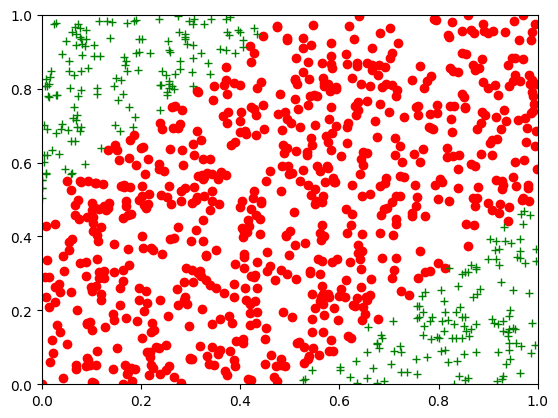

In [4]:
points = np.random.rand(1000,2)
labels = mlp.predict(points)
plt.ylim((0, 1))    
plt.xlim((0, 1))  
plt.plot(points[labels == 0, 0], points[labels == 0, 1], 'ro')
plt.plot(points[labels == 1, 0], points[labels == 1, 1], 'g+')
plt.show()

In [5]:
mlp2 = MLPClassifier(hidden_layer_sizes=(10,), activation='relu',solver='lbfgs',alpha=0.001, max_iter=10000)
mlp2.fit(X, y)                   
y_pred=mlp2.predict(X)            
print(y_pred)

[0 1 1 0]


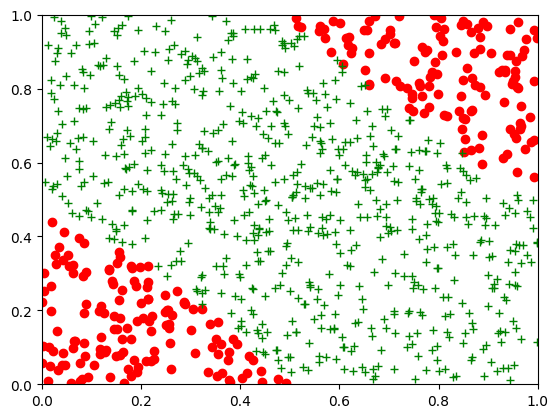

In [6]:
points = np.random.rand(1000,2)
labels = mlp2.predict(points)
plt.ylim((0, 1))    
plt.xlim((0, 1))  
plt.plot(points[labels == 0, 0], points[labels == 0, 1], 'ro')
plt.plot(points[labels == 1, 0], points[labels == 1, 1], 'g+')
plt.show()


## Exercitii
a)  Scrieți  o  funcție  care  să  implementeze  funcţia  indicator  a  triunghiului  ABC  de  vârfuri  A(-1,0),  B(0,1), C(1,0). Funcţia  indicator  ia  valoarea  1  pentru  punctele  din  interiorul  triunghiului  şi  de  pe  frontieră şi  0  în rest.

In [7]:
def eticheteazaPuncte(x, y):
    if x - y + 1 >= 0 and y >= 0 and -x - y + 1 >= 0:
        return 1
    else:
        return 0

b) Construiţi matricea Puncte de dimensiune 20000×2 care să conţină 20000 de puncte generate uniform în 
pătratul [-2 2] × [-2 2]. Aplicați funcția indicator pe datele Puncte şi plotaţi punctele colorându-le diferit în 
funcţie  de  răspunsul  funcției:  culoarea  roşie  pentru  punctele  din  afara  triunghiului  şi  culoarea  verde  pentru 
punctele din interiorul triunghiului. Ar trebuie să obțineți o figură asemănătoare cu cea de mai jos: 

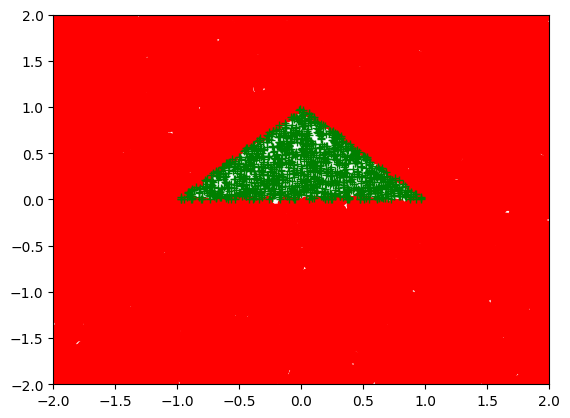

In [8]:
points = np.random.rand(20000, 2) * 4 - 2
# labels = np.array([eticheteaza(x, y) for x, y in points])\n",
labels = np.zeros(20000)
for i in range (20000):
    labels[i] = eticheteazaPuncte(points[i][0], points[i][1])

plt.ylim((-2, 2))
plt.xlim((-2, 2))
plt.plot(points[labels == 0, 0], points[labels == 0, 1], 'ro')
plt.plot(points[labels == 1, 0], points[labels == 1, 1], 'g+')
plt.show()

c)  Antrenați  o  rețea  pe  primele  10000  de  puncte  din  matricea  Puncte  care  să  învețe  funcția  indicator  a 
triunghiului ABC. Plotați rezultatele obținut pe celelalte puncte (cele 10000 rămase) colorându-le diferit în 
funcţie  de  răspunsul  reţelei:  culoarea  roşie  pentru  punctele  din  afara  triunghiului  şi  culoarea  verde  pentru 
punctele din interiorul triunghiului. 

In [10]:
train_points = points[:10000]
train_labels = labels[:10000]

test_points = points[10000:]
test_labels = labels[10000:]

print(test_points.shape)

[1.19731584 0.54402807]


In [13]:
mlp2 = MLPClassifier(hidden_layer_sizes=(10,), activation='relu',solver='lbfgs',alpha=0.001, max_iter=10000)
mlp2.fit(train_points, train_labels)
y_pred = mlp2.predict(test_points)
y_pred.shape

(10000,)

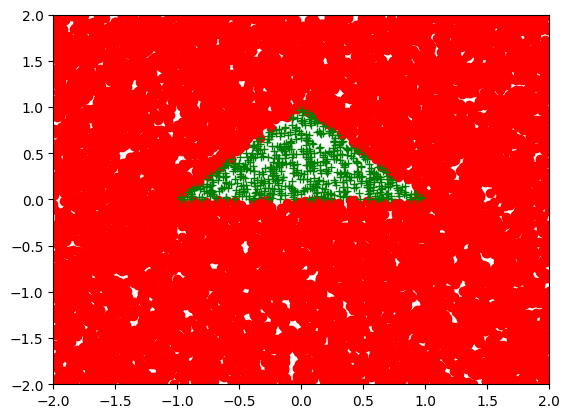

In [14]:
plt.xlim((-2, 2))
plt.ylim((-2, 2))
plt.plot(test_points[y_pred == 0, 0], test_points[y_pred == 0, 1], 'ro')
plt.plot(test_points[y_pred == 1, 0], test_points[y_pred == 1, 1], 'g+')
plt.show()

d) Care este performanța rețelei pe cele 10.000 de puncte testate?

In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred)

0.9999

In [18]:
y_zero = np.zeros(10000)
accuracy_score(test_labels, y_zero)

0.9401

In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_labels, y_pred)

array([[9400,    1],
       [   0,  599]])